# Example 5.2.2

This notebook demonstrates the results of subsection 5.2.2 of [1]. Here, we will compute the $\hat{Z}$ invariant of the homology sphere $M\left(-1; \frac{1}{2}, \frac{1}{3}, \frac{1}{9}\right)$ by leveraging its relation as a -3-surgery on the right handed trefoil.

After computing the $F_K$ invariant, the two variable invariant of Gukov and Manolescu, associated to the right handed trefoil, we will apply the surgery formula to obtain the $\hat{Z}$ invariant and the defect $\hat{Z}$ invariants.

Finally, we will compare the results with the expressions deving from the plumbing description, which we calculate using pyPlumbing.

## $F_K$ invariant

We start by computing the $F_K$ invariant for the trefoil. This is done using equation 3.44 of [1]. 

In [5]:
def eps_k(s,t,k):
    """
    Epsilon parameter. See text below equation 3.43 for details.
    """
    res = 0
    for eps in range(2):
        res += (-1)**eps *( int( (k+s*t+(-1)**eps*s+t) % (2*s*t) == 0)  + int( (k-s*t-(-1)**eps*s-t) % (2*s*t) == 0) )
    return res

def Fk_torus(s,t,x_order):
    """
    Fk invariant for a torus knot. Se equation 3.44 for details. In this function s, t define the torus knot
    x_order is the order of the Fk expansion in the variable x.
    """
    res = 0
    x,q = var("x,q")
    k_max = 2*x_order
    for k in range(1,k_max+1):
        exp = ((k**2 -  (s*t - s - t)**2)/(4*s*t))
        res += eps_k(s,t,k) * q**exp * (x**(k/2) - x**(-k/2))
    return -res*q**((s-1)*(t-1)/2)

Fk = Fk_torus(2,3,10)
Fk

((x^(19/2) - 1/x^(19/2))*q^15 + (x^(17/2) - 1/x^(17/2))*q^12 - (x^(13/2) - 1/x^(13/2))*q^7 - (x^(11/2) - 1/x^(11/2))*q^5 + (x^(7/2) - 1/x^(7/2))*q^2 + (x^(5/2) - 1/x^(5/2))*q - sqrt(x) + 1/sqrt(x))*q

We recover the $\hat{Z}$ invariant by applying the surgery formula. To that end, we define L_transoform, which applies to a Sage expression the transformation of equation  2.8.

In [6]:
load("weil_rep_fncs.sage")
def L_transform(expr,p,r,b):
    """
    Perform the Legendre transformation for the surgery formula on an F_K of equation 2.8 of [1].
    """
    Lt = 0
    for pref,u in expr.coefficients(x):
        if QQ(b/2 - r*u) % p == 0:
            Lt += pref*q^(-u^2*r/p)
    return Lt.expand()

With this, we can compute the $\hat{Z}$ with and without defects as in equation 5.5

In [10]:
print("b=0: ", format_expansion(L_transform((x**(1/2)-x**(-1/2))*Fk, -3,1,0)))
print("b=2: ",format_expansion(L_transform((x**(3/2)-x**(-3/2))*Fk, -3,1,2)))
print("b=3: ",format_expansion(L_transform((x**(2)-x**(-2))*Fk, -3,1,3)))
print("b=4: ",format_expansion(L_transform((x**(5/2)-x**(-5/2))*Fk, -3,1,4)))

b=0:  2*q*(1 + 1*q^4 + (-1)*q^5 + (-1)*q^17 + 1*q^19 + Order(q^20))
b=2:  q^(4/3)*(1 + (-2)*q + (-1)*q^3 + 1*q^6 + 2*q^10 + 1*q^15 + Order(q^20))
b=3:  2*q^(7/4)*(1 + (-1)*q^2 + 1*q^7 + 1*q^13 + Order(q^20))
b=4:  q^(7/3)*(1 + (-1)*q + 1*q^8 + 1*q^11 + Order(q^20))


## Defect $\hat{Z}$ invariants from plumbings

We compare the $q$-series produced above with the $\hat{Z}$ invariants we obtain from the plumbing formula, which we compute with pyPlumbing.

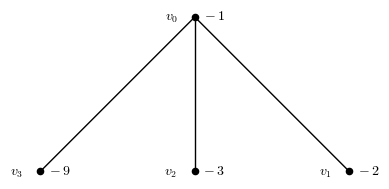

In [1]:
from pyPlumbing import Plumbing
import numpy as np
P = Plumbing.from_Seifert_data([-1,1/2, 1/3, 1/9])
P.display()

PyPlumbing provides functionality to compute the $\hat{Z}$ invariant. With trivial boundary conditions and Wilson line insersions in the heighest weight representations (0), (1), (2) on the node $v_3$ we obtain:

In [9]:
group_rank = ["A",1]
b = P.trivial_spin_c(group_rank)
print("b = %s" % b.T)
for w in [0,2,3,4]:
    W = [vector([0])]*3 + [vector([w])]
    print("w = %s" % W)
    zh = P.zhat(group_rank, b, 20, wilson=W)
    print("zh = %s" % zh)
    

b = [ 1 -1 -1 -1]
w = [(0), (0), (0), (0)]
zh = q^(1)(1 + 1q^(4) - 1q^(5) - 1q^(17) + 1q^(19) + 1q^(39) - 1q^(42) - 1q^(70) + O(q^71))
w = [(0), (0), (0), (2)]
zh = q^(26667/20000)(1/2 - 1q^(1) - 1/2q^(3) + 1/2q^(6) + 1q^(10) + 1/2q^(15) - 1/2q^(21) - 1q^(28) - 1/2q^(36) + 1/2q^(45) + O(q^55))
w = [(0), (0), (0), (3)]
zh = q^(7/4)(1 - 1q^(2) + 1q^(7) + 1q^(13) - 1q^(23) - 1q^(33) + 1q^(48) + O(q^49))
w = [(0), (0), (0), (4)]
zh = q^(46667/20000)(1/2 - 1/2q^(1) + 1/2q^(8) + 1/2q^(11) - 1/2q^(25) - 1/2q^(30) + 1/2q^(51) + 1/2q^(58) - 1/2q^(86) - 1/2q^(95) + O(q^130))


## Conclusion
Comparing the results, we can see that we have covered the whole Weil representation with defect $\hat{Z}$ invariants. Therefore we have demonstrated the Modularity Conjecture, Conjecture 4 of [1] using knot surgeries and the defect surgery formula.